In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
Y=data['median_house_value']

In [10]:
X_train ,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [11]:
train_data=X_train.join(Y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8147,-118.10,33.83,36.0,2000.0,343.0,956.0,352.0,5.3735,<1H OCEAN,234400.0
4286,-118.32,34.10,52.0,786.0,270.0,756.0,273.0,2.2311,<1H OCEAN,206300.0
10907,-117.85,33.75,27.0,2311.0,632.0,2936.0,609.0,2.5651,<1H OCEAN,171400.0
8924,-118.51,34.00,52.0,1241.0,502.0,679.0,459.0,2.3098,<1H OCEAN,500001.0
10221,-117.89,33.88,15.0,1655.0,626.0,1549.0,582.0,1.9127,<1H OCEAN,175000.0
...,...,...,...,...,...,...,...,...,...,...
1993,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
18716,-122.40,40.62,9.0,4794.0,889.0,2162.0,865.0,3.1439,INLAND,103100.0
5141,-118.27,33.96,38.0,977.0,295.0,1073.0,292.0,1.0208,<1H OCEAN,86400.0
17341,-120.40,34.86,11.0,1633.0,348.0,504.0,327.0,2.0508,<1H OCEAN,275000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

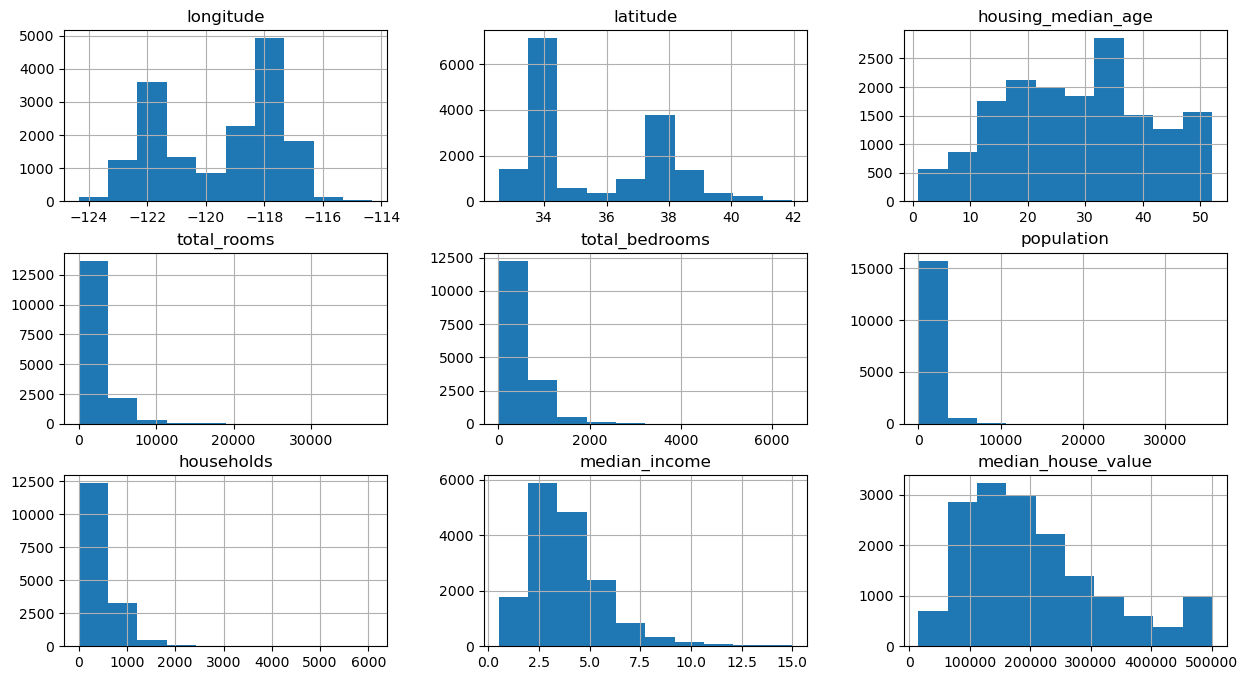

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data.corr()

C:\Users\KHUSHI RAWAT\AppData\Local\Temp\ipykernel_6656\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925081,-0.112315,0.047864,0.073006,0.102832,0.059095,-0.022241,-0.051269
latitude,-0.925081,1.000000,0.015528,-0.038837,-0.069649,-0.110878,-0.074305,-0.073751,-0.137992
housing_median_age,-0.112315,0.015528,1.000000,-0.365647,-0.325626,-0.297565,-0.307516,-0.115971,0.107922
total_rooms,0.047864,-0.038837,-0.365647,1.000000,0.930493,0.851038,0.917938,0.200530,0.133901
total_bedrooms,0.073006,-0.069649,-0.325626,0.930493,1.000000,0.873628,0.978637,-0.006574,0.048327
population,0.102832,-0.110878,-0.297565,0.851038,0.873628,1.000000,0.904466,0.005074,-0.027574
households,0.059095,-0.074305,-0.307516,0.917938,0.978637,0.904466,1.000000,0.015281,0.063938
median_income,-0.022241,-0.073751,-0.115971,0.200530,-0.006574,0.005074,0.015281,1.000000,0.689117
median_house_value,-0.051269,-0.137992,0.107922,0.133901,0.048327,-0.027574,0.063938,0.689117,1.000000


C:\Users\KHUSHI RAWAT\AppData\Local\Temp\ipykernel_6656\2405447373.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

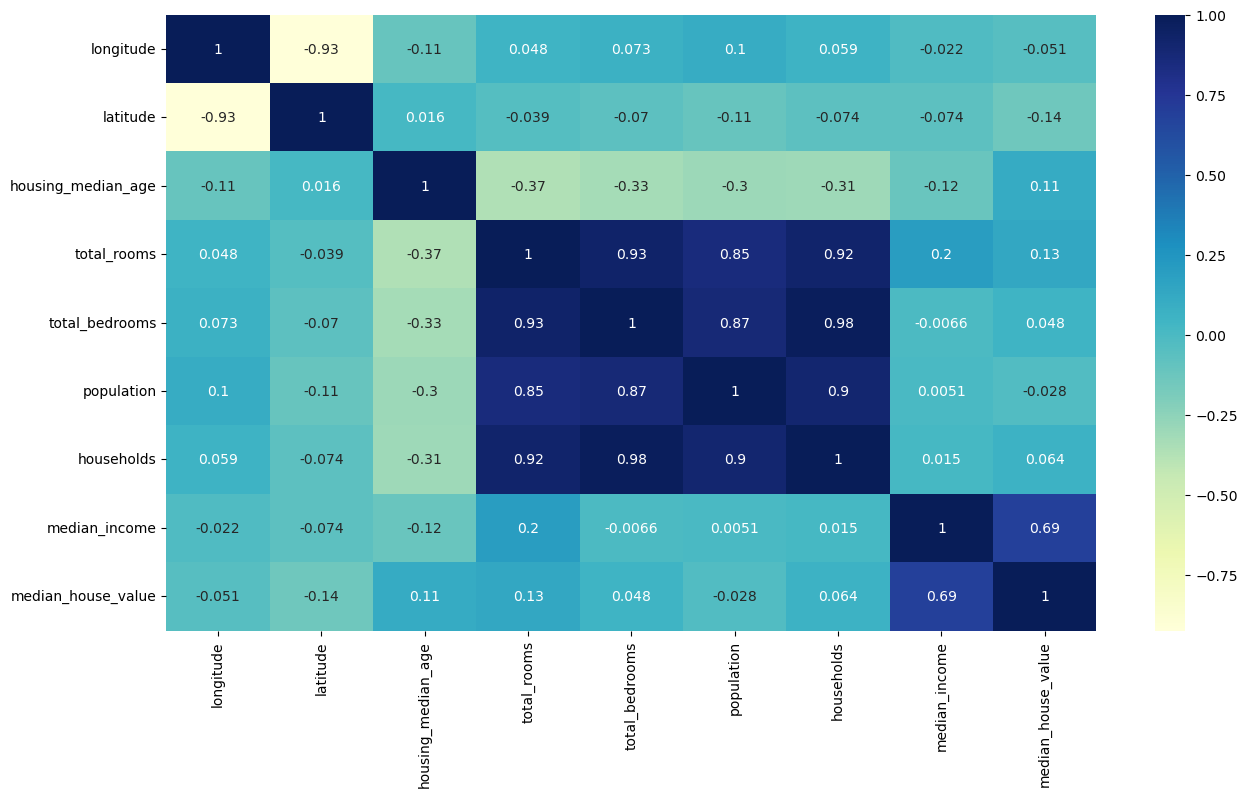

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [16]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['polpulation']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'polpulation'}>, <Axes: >, <Axes: >]],
      dtype=object)

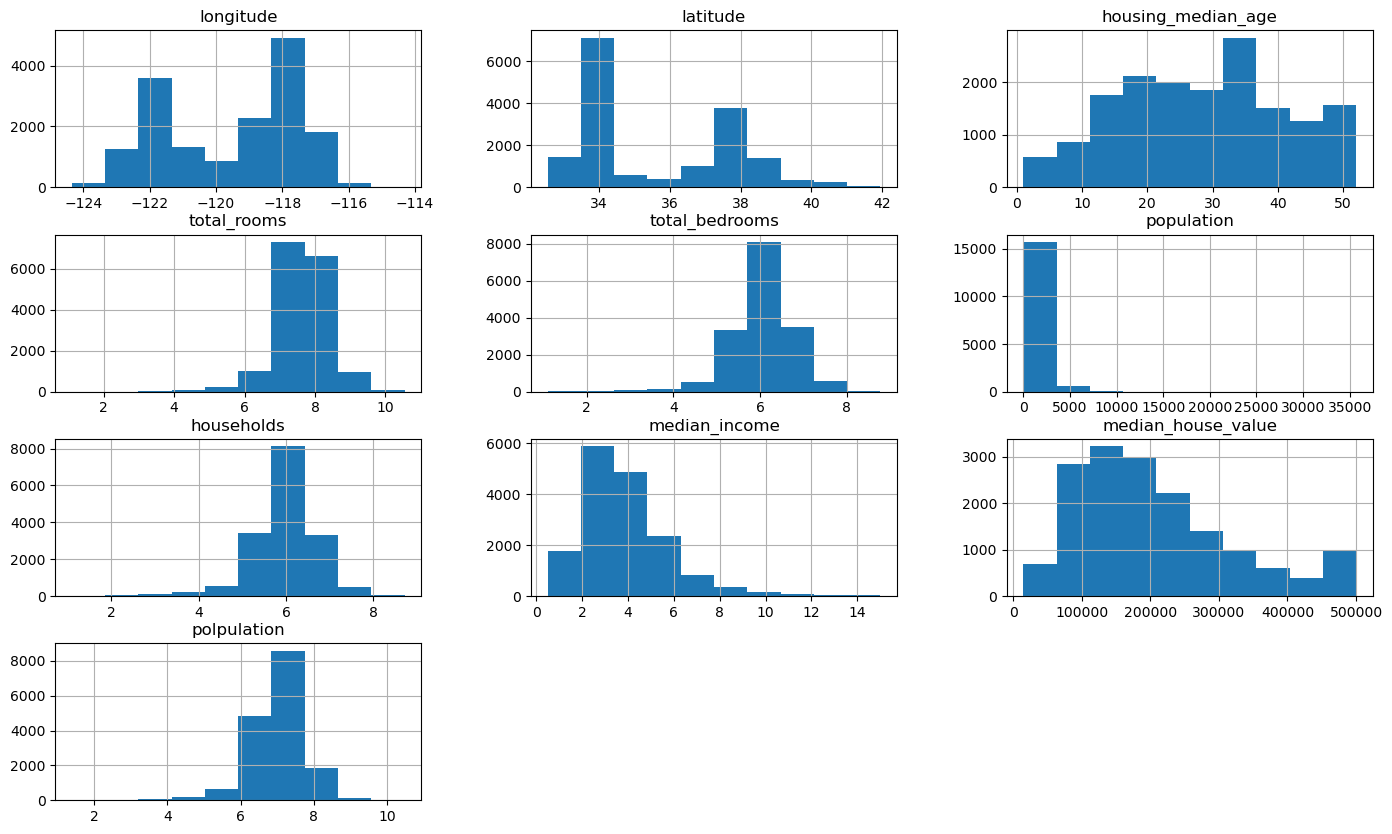

In [17]:
train_data.hist(figsize=(17,10))

In [18]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [19]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,polpulation,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8147,-118.10,33.83,36.0,7.601402,5.840642,956.0,5.866468,5.3735,234400.0,6.863803,1,0,0,0,0
4286,-118.32,34.10,52.0,6.668228,5.602119,756.0,5.613128,2.2311,206300.0,6.629363,1,0,0,0,0
10907,-117.85,33.75,27.0,7.745868,6.450470,2936.0,6.413459,2.5651,171400.0,7.985144,1,0,0,0,0
8924,-118.51,34.00,52.0,7.124478,6.220590,679.0,6.131226,2.3098,500001.0,6.522093,1,0,0,0,0
10221,-117.89,33.88,15.0,7.412160,6.440947,1549.0,6.368187,1.9127,175000.0,7.346010,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,-119.81,36.73,50.0,6.650279,5.273000,606.0,5.123964,2.2206,59200.0,6.408529,0,1,0,0,0
18716,-122.40,40.62,9.0,8.475329,6.791221,2162.0,6.763885,3.1439,103100.0,7.679251,0,1,0,0,0
5141,-118.27,33.96,38.0,6.885510,5.690359,1073.0,5.680173,1.0208,86400.0,6.979145,1,0,0,0,0
17341,-120.40,34.86,11.0,7.398786,5.855072,504.0,5.793014,2.0508,275000.0,6.224558,1,0,0,0,0


<Axes: >

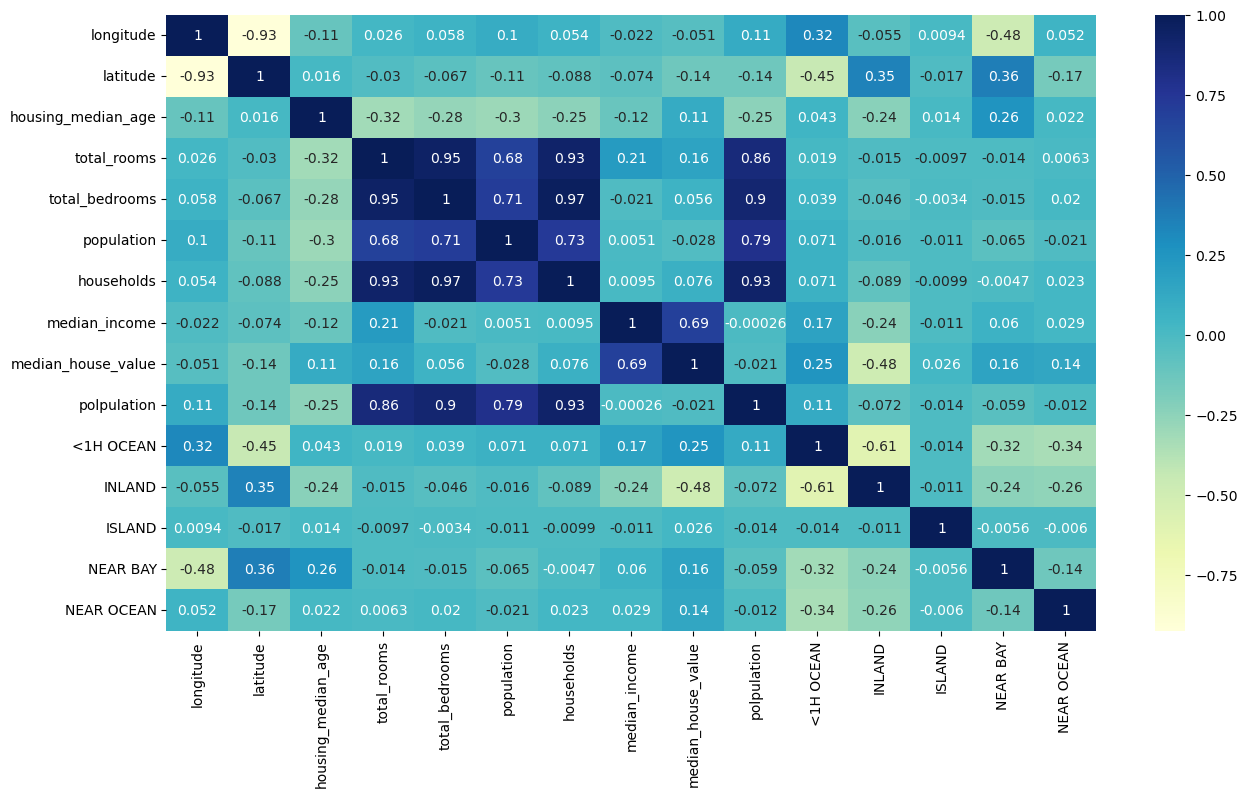

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

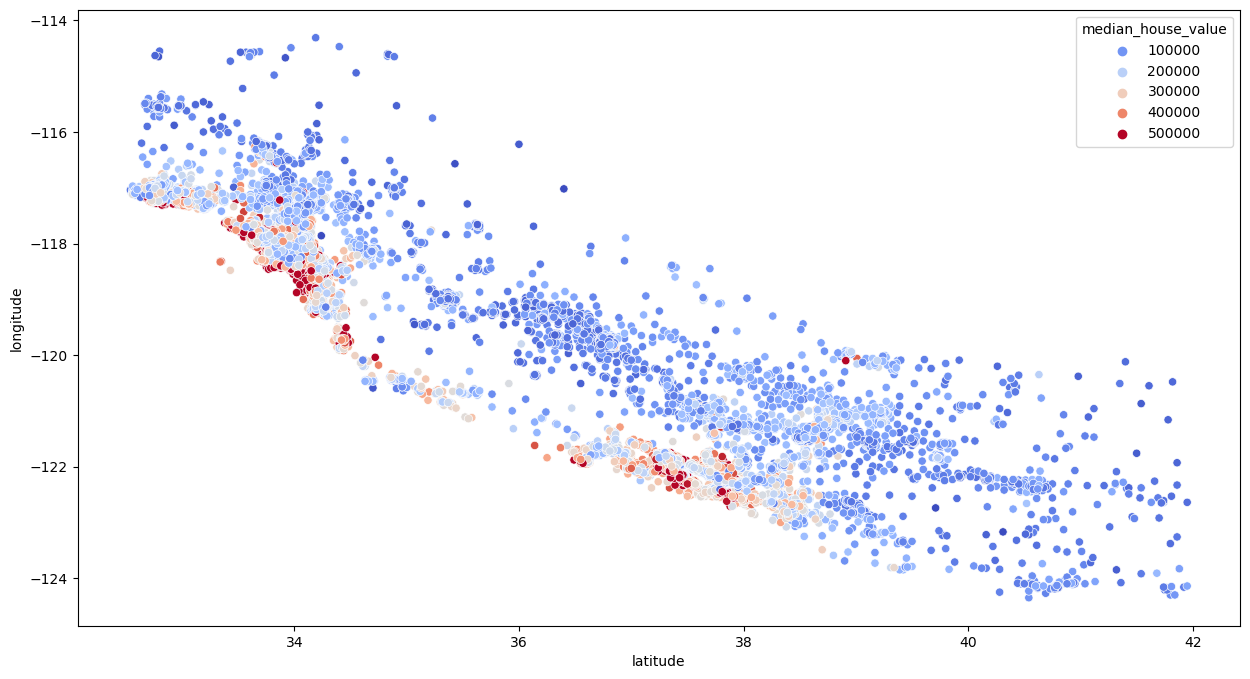

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [22]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

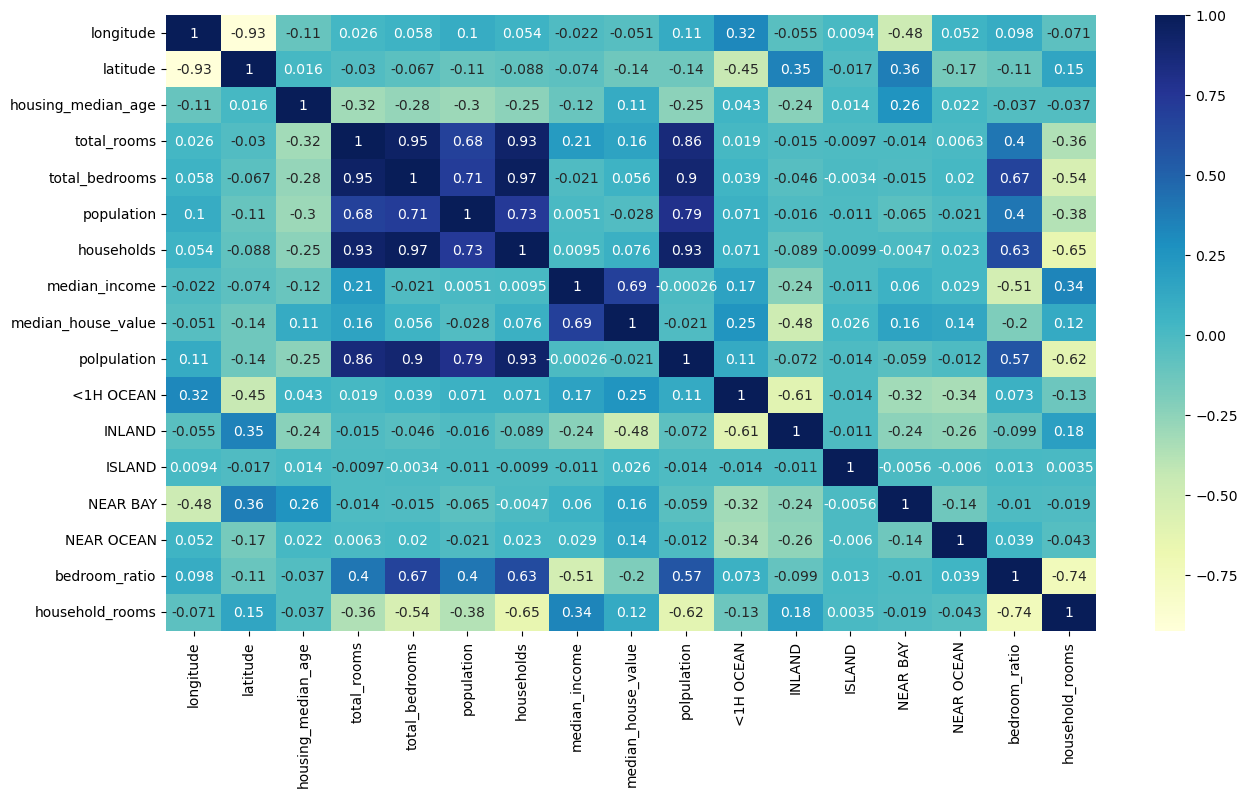

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [24]:

X_train,Y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [25]:
test_data=X_test.join(Y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['polpulation']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)


test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

X_test,Y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [26]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,polpulation,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
830,-121.99,37.61,9.0,8.207129,6.568078,2341.0,6.556778,4.6458,217000.0,7.758761,1,0,0,0,0,0.800289,1.251701
20482,-118.72,34.28,17.0,7.884200,6.171701,1392.0,6.113682,5.4459,223900.0,7.239215,1,0,0,0,0,0.782794,1.289599
12888,-121.35,38.66,24.0,8.105911,6.646391,1631.0,6.525030,2.5556,105700.0,7.397562,0,1,0,0,0,0.819944,1.242280
462,-122.27,37.87,35.0,8.076826,7.011214,1675.0,6.908755,1.7464,216700.0,7.424165,0,0,0,1,0,0.868065,1.169071
9759,-121.42,36.57,13.0,7.895808,6.432940,2474.0,6.352629,2.8775,134100.0,7.813996,1,0,0,0,0,0.814728,1.242920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19810,-118.65,36.57,20.0,7.266827,6.033086,570.0,5.420535,1.4821,143300.0,6.347389,0,1,0,0,0,0.830223,1.340611
14274,-117.13,32.70,48.0,6.668228,5.442418,917.0,5.446737,1.8750,75600.0,6.822197,0,0,0,0,1,0.816171,1.224261
11820,-121.08,38.95,18.0,7.566311,5.942799,1271.0,5.934894,2.7463,156100.0,7.148346,0,1,0,0,0,0.785429,1.274886
19604,-121.09,37.56,32.0,7.448916,5.786897,1356.0,5.730100,2.6705,91900.0,7.213032,0,1,0,0,0,0.776878,1.299963


In [27]:
reg.score(X_test,Y_test)

0.6723378199379222

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)


RandomForestRegressor()

In [50]:
forest.score(X_test,Y_test)

0.8128553617038157

In [52]:
from sklearn import ensemble
lr = ensemble.GradientBoostingRegressor()

In [55]:
model = lr.fit(X_train,Y_train)
print ("R^2 is: \n", model.score(X_test, Y_test))

R^2 is: 
 0.7636792054607154
